In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC

In [2]:
# Load the diabetes dataset
diabetes_full = pd.read_csv('diabetesNHANES.csv')

# Use a smaller random sample of 50 instances
seed = 123
diabetes = diabetes_full.sample(n=50, random_state=seed)
diabetes.head()

,SEQN,diabetes,glucose,insulin,cholesterol,outcome,systolic,diastolic
676,95955,no,5.72,14.08,141,0,56,104
1226,101787,no,4.83,6.89,131,0,67,125
437,101485,no,5.16,15.73,192,0,63,107
1371,99191,no,6.55,12.92,200,0,39,114
1659,101444,pre,6.38,31.09,188,0,76,129


## Logistic regression

In [3]:
# Define input features and output features
X = diabetes[['glucose']]
y = diabetes[['outcome']]

In [4]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty=None)

# Fit the model
logisticModel.fit(X.values, np.ravel(y))


LogisticRegression(penalty=None)

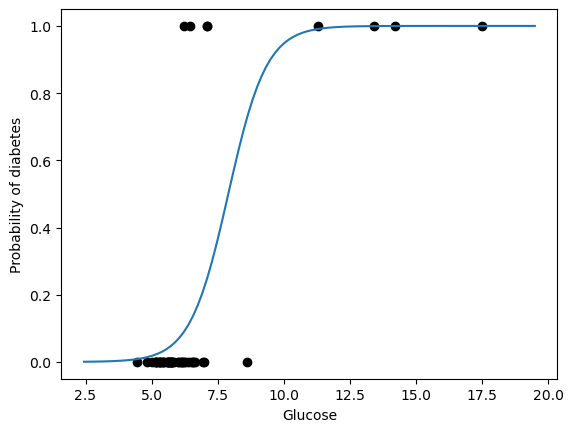

In [5]:
# Plot the data and predicted probabilities
fig = plt.figure()
plt.scatter(X, y, color='black')

x_prob = np.linspace(X.min()-2, X.max()+2, 100)
y_prob = logisticModel.predict_proba(x_prob.reshape(-1, 1))[:, 1]

plt.plot(x_prob, y_prob)
plt.xlabel('Glucose')
plt.ylabel('Probability of diabetes')

plt.show()

In [6]:
# Calculate predicted probabilities
p_hat = logisticModel.predict_proba(X.values)
p_hat[0:6]

array([[0.95315971, 0.04684029],
       [0.9858269 , 0.0141731 ],
       [0.97782582, 0.02217418],
       [0.8660879 , 0.1339121 ],
       [0.89105607, 0.10894393],
       [0.97782582, 0.02217418]])

In [7]:
# Compute the overall log loss
metrics.log_loss(y_true = y, y_pred = p_hat)

0.22687141476159398

In [8]:
# Compute the overall absolute loss
absloss=abs(np.ravel(y)-p_hat[:,1])

sum(absloss)/len(absloss)

0.13205074500367076

## Linear discriminant analysis

In [9]:
# Define input features and output features
X2 = diabetes[['glucose', 'systolic']]
y = diabetes[['outcome']]

# Scale the input features
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [10]:
# Initialize a linear discriminant model
LDAmodel = LinearDiscriminantAnalysis(n_components=1)

# Fit the model
LDAmodel.fit(X2, np.ravel(y))

LinearDiscriminantAnalysis(n_components=1)

In [11]:
# Compute the overall hinge loss
metrics.hinge_loss(y,LDAmodel.decision_function(X2))


0.30480188787131707